In [1]:
%matplotlib inline

In [3]:
!pip install sparqlwrapper

  Using cached SPARQLWrapper-1.8.0.zip
  Using cached rdflib-4.2.2-py3-none-any.whl
  Using cached isodate-0.5.4.tar.gz
  Running setup.py bdist_wheel for sparqlwrapper ... done
  Stored in directory: /home/sirex/.cache/pip/wheels/3c/b6/36/90a0877c0a7ac2933a16c446b535af632831b3fd692e1910fe
  Running setup.py bdist_wheel for isodate ... done
  Stored in directory: /home/sirex/.cache/pip/wheels/61/c0/d2/6b4a10c222ba9261ab9872a8f05d471652962284e8c677e5e7
Successfully built sparqlwrapper isodate


In [17]:
import pandas as pd
import matplotlib as mpl

from pandas.io.json import json_normalize
from SPARQLWrapper import SPARQLWrapper, JSON

In [21]:
mpl.style.use('ggplot')
mpl.rc('font', family='Ubuntu', size=16)
mpl.rc('figure', figsize=(16, 10))

In [5]:
def select(query, service='https://query.wikidata.org/sparql'):
    sparql = SPARQLWrapper(service)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query().convert()
    return json_normalize(result['results']['bindings'])

In [6]:
data = select('''
SELECT ?sLabel ?population ?s WHERE {
  ?s p:P31/ps:P31 wd:Q515 ;
     wdt:P17 wd:Q37 ;
     wdt:P1082 ?population .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "lt". }
}
ORDER BY DESC(?population)
''')

In [8]:
data.head(1).T

0
population.datatype  http://www.w3.org/2001/XMLSchema#decimal
population.type                                       literal
population.value                                       532762
s.type                                                    uri
s.value                   http://www.wikidata.org/entity/Q216
sLabel.type                                           literal
sLabel.value                                          Vilnius
sLabel.xml:lang                                            lt

In [10]:
data['population'] = data['population.value'].astype(int)

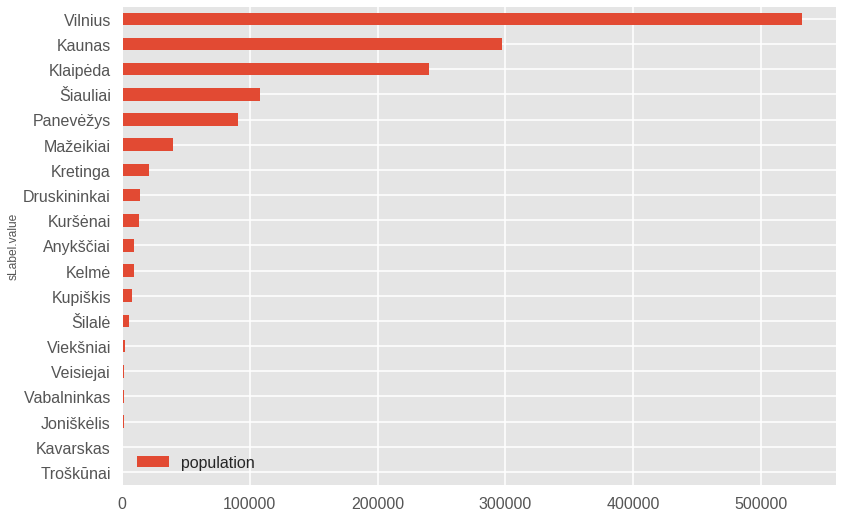

In [34]:
data[['sLabel.value', 'population']].set_index('sLabel.value').sort_values('population', ascending=True).plot.barh()